# 最初に読み込ませるセル

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

figsize_x = 2.5
figsize_y = 2.5

# インストール
`imagemagick` がいるようだ。
適当にインストールする。

`Anaconda` で `Python` をインストールしてあって `matplotlib` を使える前提。

## Windows かつ msys
```
pacman -S mingw64/mingw-w64-x86_64-imagemagick
pacman -Syu mingw64/mingw-w64-x86_64-ffmpeg

```

## Mac
```
brew install imagemagick # gif 保存用
brew install ffmpeg      # mp4 保存用
```

# matplotlibrc の設定
- `print(mpl.matplotlib_fname())` でファイルの場所を調べる。
    - `Windows` の `Anaconda` で入れると `Anaconda3/Lib/site-packages/matplotlib/mpl-data` にある。
- 該当ファイルをバックアップする。
- `animation.convert_path` に適切に設定する。下記は一例（自分用メモ）。
    - Windows ではクオートでくくらないこと。

```
animation.ffmpeg_path: c:\ap\msys64\mingw64\bin\ffmpeg.exe
animation.convert_path: c:\ap\msys64\mingw64\bin\magick.exe
```

- `Jupyter` 再起動：「Restart & Clear Output」で。

# アニメーション生成関数
Animationを生成する関数が2種類ある

- ArtistAnimation: あらかじめ全てのフレームをlistで用意しておく
- FuncAnimation: 各フレームを動的に生成する

`FuncAnimation` の方が柔軟らしい.

# 正弦波のアニメーション
`gif`, `mp4` 両方を生成する。

実際にアニメーションのファイルを作りたい場合はコメントアウトを外して実行する。

<IPython.core.display.Javascript object>


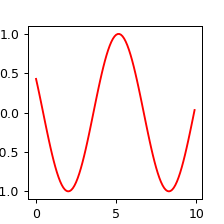

In [14]:
%matplotlib nbagg
figsize_x = 2.5
figsize_y = 2.5
fig = plt.figure(figsize=(figsize_x, figsize_y))
x = np.arange(0, 10, 0.1)

ims = []
for a in range(50):
    y = np.sin(x - a)
    line, = plt.plot(x, y, "r")
    ims.append([line])

ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
plt.show()

<IPython.core.display.Javascript object>


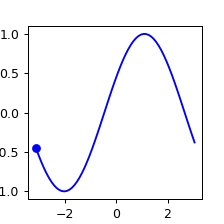

In [16]:
%matplotlib nbagg
fig = plt.figure(figsize=(figsize_x, figsize_y))
x = np.arange(-np.pi, np.pi, 0.1)
 
ims = []
for a in range(40):
    y = np.sin(x - a / 20 *  np.pi)
    # sinカーブ
    im1, = plt.plot(x, y, "b")
    # 点
    im2, = plt.plot(-np.pi, np.sin(-np.pi - a / 20 *  np.pi), marker='o', color='b' )
 
    ims.append([im1, im2])
 
ani = animation.ArtistAnimation(fig, ims, interval=33)
#ani.save('sample.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


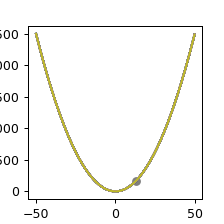

In [3]:
%matplotlib nbagg
ims = []
fig = plt.figure(figsize=(figsize_x, figsize_y))
x = np.arange(-50, 50, 0.1)
y = x ** 2

for i in range(50):
    plt.plot(x, y)
    g = plt.plot(i, i ** 2, 'o')
    ims.append(g)

ani = animation.ArtistAnimation(fig, ims, interval=50)
plt.show()
#ani.save('sample.gif', writer='imagemagick')

### 参考
- https://stackoverflow.com/questions/31921313/matplotlib-animation-moving-square

<IPython.core.display.Javascript object>


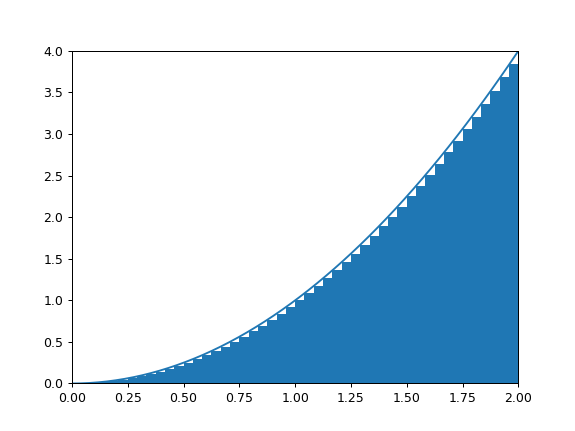

In [11]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

def f(x):
    return x**2
vf = np.vectorize(f)

x_min = 0
x_max = 2
step = 0.1
y_min = f(x_min)
y_max = f(x_max)
frames = 51
interval = 10
alpha = 0.5
step = x_max / frames

x = np.arange(x_min, x_max+step, step)
y = vf(x)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.plot(x, y)
patch = patches.Rectangle((x[0],y[0]),1.2,1.0)
ps = []
for i in range(frames):
    ps.append(patches.Rectangle((0, 0), 0, 0, alpha=alpha))

def init():
    for i in range(frames):
        ax.add_patch(ps[i])
    return ps

def animate(n):
    length = (x_max - x_min) if n == 0 else (x_max - x_min) / n
    x0 = (x_max - x_min) / 2

    for i in range(n):
        ps[i].set_width(length)
        x0 = 0 + length * i
        ps[i].set_height(f(x0))
        ps[i].set_xy([x0, 0])        
    
    return ps

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=frames,
                               interval=interval,
                               blit=True)
anim.save('anim.gif', writer='imagemagick')